# Import thu vien

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_excel('gia_vang_raw.xlsx')
data.head()

,Ngay,LoaiVang,GiaMua,GiaBan,KhoiLuongGiaoDich,TyGiaUSD,DiaDiem
0,2024-03-11,PNJ,76259586.0,77384889.0,66.0,23144.0,TP.HCM
1,2024-01-05,Bảo Tín Minh Châu,74907360.0,76092800.0,426.0,22782.0,Hà Nội
2,2024-06-06,PNJ,72670948.0,74064825.0,405.0,22529.0,Hà Nội
3,2024-01-29,Bảo Tín Minh Châu,74596249.0,75746038.0,181.0,23100.0,Đà Nẵng
4,2024-02-27,PNJ,75629918.0,76659910.0,210.0,23180.0,Đà Nẵng


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ngay               2213 non-null   object 
 1   LoaiVang           2227 non-null   object 
 2   GiaMua             2211 non-null   float64
 3   GiaBan             2204 non-null   float64
 4   KhoiLuongGiaoDich  2215 non-null   float64
 5   TyGiaUSD           2204 non-null   float64
 6   DiaDiem            2227 non-null   object 
dtypes: float64(4), object(3)
memory usage: 121.9+ KB


# Phần 1: Làm sạch dữ liệu (15 điểm)

In [38]:
# Đọc dữ liệu có giá trị thiếu
missing_count = data.isnull().sum()
print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_count)

Số lượng giá trị thiếu trong mỗi cột:
Ngay                 14
LoaiVang              0
GiaMua               16
GiaBan               23
KhoiLuongGiaoDich    12
TyGiaUSD             23
DiaDiem               0
dtype: int64


In [39]:
print(f"Ty le Nan cua cot GiaMua: {((data['GiaMua'].isnull().sum()) / len(data['GiaMua'])):.2%}")
print(f"Ty le Nan cua cot GiaBan: {((data['GiaBan'].isnull().sum()) / len(data['GiaBan'])):.2%}")
print(f"Ty le Nan cua cot KhoiLuongGiaoDich: {((data['KhoiLuongGiaoDich'].isnull().sum()) / len(data['KhoiLuongGiaoDich'])):.2%}")
print(f"Ty le Nan cua cot TyGiaUSD: {((data['TyGiaUSD'].isnull().sum()) / len(data['TyGiaUSD'])):.2%}")

Ty le Nan cua cot GiaMua: 0.72%
Ty le Nan cua cot GiaBan: 1.03%
Ty le Nan cua cot KhoiLuongGiaoDich: 0.54%
Ty le Nan cua cot TyGiaUSD: 1.03%


In [40]:
data['Ngay'] = pd.to_datetime(data['Ngay'], errors='coerce')
data['Ngay'].isnull().sum()

np.int64(68)

In [41]:
data['Ngay'] = data['Ngay'].ffill()

## 2. Chuẩn hóa chuỗi (2 điểm)

In [43]:
data[['LoaiVang', 'DiaDiem']].head(10)

,LoaiVang,DiaDiem
0,PNJ,TP.HCM
1,Bảo Tín Minh Châu,Hà Nội
2,PNJ,Hà Nội
3,Bảo Tín Minh Châu,Đà Nẵng
4,PNJ,Đà Nẵng
5,SJC,Hà Nội
6,DOJI,Đà Nẵng
7,SJC,TP.HCM
8,SJC,Hà Nội
9,SJC,TP.HCM


In [44]:
def visualize_gia_vang_and_address(data): 
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.countplot(y='LoaiVang', data=data)
    plt.title('Phân bố loại vàng')
    plt.subplot(1,2,2)
    sns.countplot(y='DiaDiem', data=data)
    plt.title('Phân bố địa điểm')
    plt.tight_layout()
    plt.show()

In [45]:
def chuan_hoa(data):
    """
    Loại bỏ khoảng trắng, chuẩn hóa về chữ hoa và rút gọn tên thương hiệu/địa điểm
    """
    def xu_ly_loaivang(row):
        if pd.isna(row): 
            return row
        row = str(row).strip().upper()
        if 'BẢO TÍN MINH CHÂU' in row:
            return 'BTMC'
        return row
    def xu_ly_diadiem(row):
        if pd.isna(row): 
            return row
        row = str(row).strip().upper()
        if 'HÀ NỘI' in row:
            return 'HN'
        elif 'ĐÀ NẴNG' in row:
            return 'DN'
        elif 'TP.HCM' in row:
            return 'HCM' 
        return row
    try:
        data['LoaiVang'] = data['LoaiVang'].apply(xu_ly_loaivang)
        data['DiaDiem'] = data['DiaDiem'].apply(xu_ly_diadiem)
    except Exception as e:
        print(f"Loi o ham chuan_hoa: {e}")
    return data
data = chuan_hoa(data)

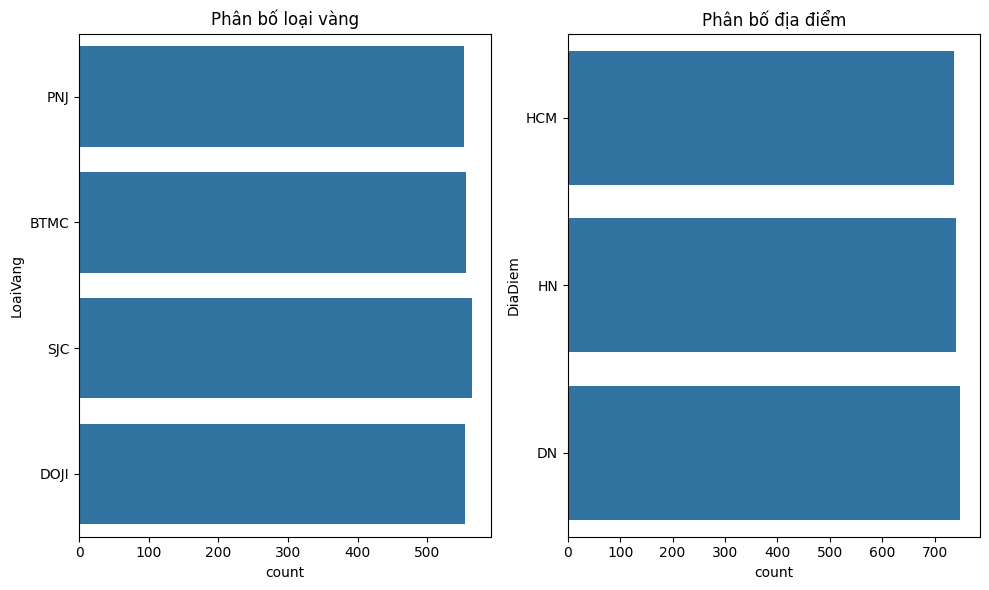

In [47]:
visualize_gia_vang_and_address(data)

In [48]:
data.head(10)

,Ngay,LoaiVang,GiaMua,GiaBan,KhoiLuongGiaoDich,TyGiaUSD,DiaDiem
0,2024-03-11,PNJ,76259586.0,77384889.0,66.0,23144.0,HCM
1,2024-01-05,BTMC,74907360.0,76092800.0,426.0,22782.0,HN
2,2024-06-06,PNJ,72670948.0,74064825.0,405.0,22529.0,HN
3,2024-01-29,BTMC,74596249.0,75746038.0,181.0,23100.0,DN
4,2024-02-27,PNJ,75629918.0,76659910.0,210.0,23180.0,DN
5,2024-02-21,SJC,75746590.0,76403677.0,90.0,22869.0,HN
6,2024-05-24,DOJI,75380388.0,76560816.0,241.0,22998.0,DN
7,2024-06-16,SJC,74200475.0,75519947.0,257.0,23249.0,HCM
8,2024-06-10,SJC,74261179.0,75334270.0,457.0,23422.0,HN
9,2024-06-03,SJC,76356922.0,75080881.0,378.0,23290.0,HCM


In [49]:
data['GiaMua'].median()

74557489.0

## 3. Xử lý giá vàng (4 điểm)

In [50]:
def xu_ly_gia_vang(data):
    """
    GiaMua hợp lệ: 50-100 triệu VNĐ
    Giá không hợp lệ → điền bằng median theo LoaiVang
    GiaBan phải > GiaMua, nếu không → GiaBan = GiaMua + 1 triệu
    """
    #Xu ly nan
    median_mua_by_type = data.groupby('LoaiVang')['GiaMua'].median()
    median_ban_by_type = data.groupby('LoaiVang')['GiaBan'].median()

    def fil_median_gia(row):
        if pd.isna(row['GiaMua']) or row['GiaMua'] > 80000000 or row['GiaMua'] < 70000000:
            row['GiaMua'] = median_mua_by_type[row['LoaiVang']]
        return row['GiaMua']

    def fil_gia_ban(row):
        if (pd.isna(row['GiaBan']) or row['GiaBan'] > 100000000) and row['GiaBan'] > row['GiaMua']:
            row['GiaBan'] = median_ban_by_type[row['LoaiVang']]
        if row['GiaBan'] <= row['GiaMua']:
            row['GiaBan'] = row['GiaMua'] + 1000000
        return row['GiaBan']

    try:
        data['GiaMua'] = data.apply(fil_median_gia, axis=1)
        data['GiaBan'] = data.apply(fil_gia_ban, axis=1)
    except Exception as e:
        print(f"Loi o ham xu_ly_gia_vang: {e}")
    return data


## 4. Xử lý khối lượng (2 điểm)

In [52]:
def xu_ly_khoi_luong(data):
    """
    Khối lượng hợp lệ: 10-1000 kg
    Giá trị không hợp lệ → điền bằng median
    """
    def fil_khoi_luong(row):
        if pd.isna(row['KhoiLuongGiaoDich']) or row['KhoiLuongGiaoDich'] < 10 or row['KhoiLuongGiaoDich'] > 1000:
            row['KhoiLuongGiaoDich'] = data['KhoiLuongGiaoDich'].median()
        return row['KhoiLuongGiaoDich']
    try:
        data['KhoiLuongGiaoDich'] = data.apply(fil_khoi_luong, axis = 1)
    except Exception as e:
        print(f"Loi o ham xu_ly_khoi_luong: {e}")
    return data
data = xu_ly_khoi_luong(data)
data.head(10)

,Ngay,LoaiVang,GiaMua,GiaBan,KhoiLuongGiaoDich,TyGiaUSD,DiaDiem
0,2024-03-11,PNJ,76259586.0,77384889.0,66.0,23144.0,HCM
1,2024-01-05,BTMC,74907360.0,76092800.0,426.0,22782.0,HN
2,2024-06-06,PNJ,72670948.0,74064825.0,405.0,22529.0,HN
3,2024-01-29,BTMC,74596249.0,75746038.0,181.0,23100.0,DN
4,2024-02-27,PNJ,75629918.0,76659910.0,210.0,23180.0,DN
5,2024-02-21,SJC,75746590.0,76403677.0,90.0,22869.0,HN
6,2024-05-24,DOJI,75380388.0,76560816.0,241.0,22998.0,DN
7,2024-06-16,SJC,74200475.0,75519947.0,257.0,23249.0,HCM
8,2024-06-10,SJC,74261179.0,75334270.0,457.0,23422.0,HN
9,2024-06-03,SJC,76356922.0,75080881.0,378.0,23290.0,HCM


## 5. Xử lý tỷ giá (2 điểm)

In [54]:
def xu_ly_ty_gia(data):
    """
    Tỷ giá hợp lệ: 22,000-25,000 VNĐ/USD
    Null → điền bằng mean
    """
    def fil_ty_gia(row):
        if pd.isna(row['TyGiaUSD']) or row['TyGiaUSD'] < 22000 or row['TyGiaUSD'] > 25000:
            row['TyGiaUSD'] = data['TyGiaUSD'].mean()
        return row['TyGiaUSD']
    try:
        data['TyGiaUSD'] = data.apply(fil_ty_gia, axis=1)
    except Exception as e:
        print(f"Loi o ham xu_ly_ty_gia: {e}")
    return data
data = xu_ly_ty_gia(data)

In [56]:
for row in data['TyGiaUSD']:
    if row < 22000 or row > 25000:
        print("Con gia tri khong hop le trong cot TyGiaUSD")
        break
    else: 
        print("Chuan hoa thanh cong!")
        break

Chuan hoa thanh cong!


## 6. Loại bỏ trùng lặp (3 điểm)

In [57]:
def loai_bo_trung_lap(data):
    """
    Dựa trên: Ngay + LoaiVang + DiaDiem
    Giữ bản ghi đầu tiên
    """
    try:
        data = data.drop_duplicates(subset=['Ngay', 'LoaiVang', 'DiaDiem'], keep='first')
    except Exception as e:
        print(f"Loi o ham loai_bo_trung_lap: {e}")
    return data
data = loai_bo_trung_lap(data)
data.head(10)

,Ngay,LoaiVang,GiaMua,GiaBan,KhoiLuongGiaoDich,TyGiaUSD,DiaDiem
0,2024-03-11,PNJ,76259586.0,77384889.0,66.0,23144.0,HCM
1,2024-01-05,BTMC,74907360.0,76092800.0,426.0,22782.0,HN
2,2024-06-06,PNJ,72670948.0,74064825.0,405.0,22529.0,HN
3,2024-01-29,BTMC,74596249.0,75746038.0,181.0,23100.0,DN
4,2024-02-27,PNJ,75629918.0,76659910.0,210.0,23180.0,DN
5,2024-02-21,SJC,75746590.0,76403677.0,90.0,22869.0,HN
6,2024-05-24,DOJI,75380388.0,76560816.0,241.0,22998.0,DN
7,2024-06-16,SJC,74200475.0,75519947.0,257.0,23249.0,HCM
8,2024-06-10,SJC,74261179.0,75334270.0,457.0,23422.0,HN
9,2024-06-03,SJC,76356922.0,75080881.0,378.0,23290.0,HCM


In [58]:
data.to_excel('gia_vang_cleaned.xlsx', index=False)

# Phần 2: Phân tích dữ liệu (15 điểm)

## 7. Tính toán các chỉ số (5 điểm)

In [ ]:
df = data.copy()
def create_distance(row):
    row['ChenhLech'] = row['GiaBan'] - row['GiaMua']
    return row['ChenhLech']
df['ChenhLech'] = df.apply(create_distance, axis=1)
#df.head()
df['BienDongGia'] = df.groupby('LoaiVang')['GiaBan'].diff(1)
df.head()

In [ ]:
def tinh_toan_chi_so(data):
    """ 
    ChenhLech = GiaBan - GiaMua
    TyLeChenhLech (%)
    GiaTriGiaoDich = GiaBan × KhoiLuongGiaoDich
    GiaUSD = GiaBan / TyGiaUSD
    BienDongGia = chênh lệch giá so với ngày hôm trước (theo LoaiVang)
    MA7 = Moving Average 7 ngày của GiaBan
    """
    try:
        data['ChenhLech'] = data['GiaBan'] - data['GiaMua']
        data['TyLeChenhLech'] = data['ChenhLech'] / data['GiaMua']
        data['GiaTriGiaoDich'] = data['GiaBan'] * data['KhoiLuongGiaoDich']
        data['GiaUSD'] = data['GiaBan'] / data['TyGiaUSD']
        data['BienDongGia'] = data.groupby('LoaiVang')['GiaBan'].diff(1)
        data['MA7'] = data.groupby('LoaiVang')['GiaBan'].transform(lambda x: x.rolling(7).mean())
    except Exception as e:
        print(f'Loi o ham tinh_toan_chi_so: {e}')
    return data
df = tinh_toan_chi_so(df)
df.head(10)

,Ngay,LoaiVang,GiaMua,GiaBan,KhoiLuongGiaoDich,TyGiaUSD,DiaDiem,ChenhLech,BienDongGia,TyLeChenhLech,GiaTriGiaoDich,GiaUSD,MA7
0,2024-03-11,PNJ,76259586.0,77384889.0,66.0,23144.0,HCM,1125303.0,NaN,0.014756,5.107403e+09,3343.626383,NaN
1,2024-01-05,BTMC,74907360.0,76092800.0,426.0,22782.0,HN,1185440.0,NaN,0.015825,3.241553e+10,3340.040383,NaN
2,2024-06-06,PNJ,72670948.0,74064825.0,405.0,22529.0,HN,1393877.0,-3320064.0,0.019181,2.999625e+10,3287.532736,NaN
3,2024-01-29,BTMC,74596249.0,75746038.0,181.0,23100.0,DN,1149789.0,-346762.0,0.015413,1.371003e+10,3279.049264,NaN
4,2024-02-27,PNJ,75629918.0,76659910.0,210.0,23180.0,DN,1029992.0,2595085.0,0.013619,1.609858e+10,3307.157463,NaN
5,2024-02-21,SJC,75746590.0,76403677.0,90.0,22869.0,HN,657087.0,NaN,0.008675,6.876331e+09,3340.927762,NaN
6,2024-05-24,DOJI,75380388.0,76560816.0,241.0,22998.0,DN,1180428.0,NaN,0.015660,1.845116e+10,3329.020610,NaN
7,2024-06-16,SJC,74200475.0,75519947.0,257.0,23249.0,HCM,1319472.0,-883730.0,0.017783,1.940863e+10,3248.309476,NaN
8,2024-06-10,SJC,74261179.0,75334270.0,457.0,23422.0,HN,1073091.0,-185677.0,0.014450,3.442776e+10,3216.389292,NaN
9,2024-06-03,SJC,76356922.0,75080881.0,378.0,23290.0,HCM,-1276041.0,-253389.0,-0.016712,2.838057e+10,3223.738987,NaN


In [ ]:
df.to_excel('gia_vang_cleaned.xlsx', index=False)

## 8. Thống kê theo loại vàng (3 điểm)

- Giá trung bình, min, max, độ lệch chuẩn
- Tổng khối lượng, tổng giá trị giao dịch
- Chênh lệch mua-bán trung bình

In [ ]:
df.describe()

,Ngay,GiaMua,GiaBan,KhoiLuongGiaoDich,TyGiaUSD,ChenhLech,BienDongGia,TyLeChenhLech,GiaTriGiaoDich,GiaUSD,MA7
count,2108,2.100000e+03,2.087000e+03,2108.000000,2108.000000,2.079000e+03,2.062000e+03,2079.000000,2.087000e+03,2087.000000,1.937000e+03
mean,2024-03-31 05:18:19.810246656,7.563037e+07,7.556537e+07,273.087287,22999.766507,-8.306813e+04,-2.211479e+03,inf,2.063179e+10,3286.082129,7.556750e+07
min,2024-01-01 00:00:00,-9.734837e+06,7.127000e+07,50.000000,22500.000000,-9.256221e+08,-5.430051e+06,-45.845719,3.704557e+09,3055.912700,7.388406e+07
25%,2024-02-15 00:00:00,7.360799e+07,7.459143e+07,164.750000,22755.000000,7.425610e+05,-1.202178e+06,0.009905,1.238307e+10,3238.384927,7.514354e+07
50%,2024-03-31 00:00:00,7.455173e+07,7.554789e+07,272.000000,22996.500000,9.912150e+05,3.092200e+04,0.013242,2.049189e+10,3287.200130,7.556059e+07
75%,2024-05-16 00:00:00,7.554624e+07,7.653424e+07,385.000000,23249.250000,1.239822e+06,1.188027e+06,0.016573,2.893708e+10,3333.898072,7.596372e+07
max,2024-06-30 00:00:00,1.000000e+09,7.839972e+07,499.000000,23499.000000,8.425418e+07,5.576172e+06,inf,3.856782e+10,3460.240812,7.747290e+07
std,NaN,4.121326e+07,1.237730e+06,128.585470,288.204596,4.135415e+07,1.664343e+06,NaN,9.732119e+09,67.379200,5.724603e+05


In [ ]:
df1 = df.copy()
def thong_ke_theo_loai_vang(data):
    """
    - Giá trung bình, min, max, độ lệch chuẩn
    - Tổng khối lượng, tổng giá trị giao dịch
    - Chênh lệch mua-bán trung bình
    """
    try:
        thong_ke = data.groupby('LoaiVang').agg({
            'GiaMua': ['mean', 'min', 'max', 'std'],
            'GiaBan': ['mean', 'min', 'max', 'std'],
            'KhoiLuongGiaoDich': 'sum',
            'GiaTriGiaoDich': 'sum',
            'ChenhLech': 'mean'
        }) # agg phương thức .agg() cho phép áp dụng các hàm tuỳ chỉnh riêng cho một DataFrame, 
        #cũng như áp dụng các hàm cho nhiều cột của DataFrame cùng một lúc, giúp việc tổng hợp dữ liệu trở nên hiệu quả.
        # Đặt lại tên cột
        thong_ke.columns = [
            'GiaMua_TB', 'GiaMua_min', 'GiaMua_max', 'GiaMua_std',
            'GiaBan_TB', 'GiaBan_min', 'GiaBan_max', 'GiaBan_std',
            'TongKhoiLuong', 'TongGiaTriGiaoDich', 'ChenhLech_TB'
        ]
    except Exception as e:
        print(f'Loi o ham thong_ke_theo_loai_vang: {e}')
    return thong_ke
thong_ke = thong_ke_theo_loai_vang(df1)

In [ ]:
thong_ke.to_excel('thong_ke_theo_loai_vang.xlsx')

## 9. Phân tích theo tháng (3 điểm)

- Giá TB, min, max mỗi tháng

- Tổng khối lượng giao dịch/tháng

- Xác định tháng có giá cao nhất/thấp nhất

In [ ]:
df2 = df1.copy()
df2['Thang'] = df2['Ngay'].dt.to_period('M')
def thong_ke_theo_thang(data):
    """
    - Giá TB, min, max mỗi tháng

    - Tổng khối lượng giao dịch/tháng

    - Xác định tháng có giá cao nhất/thấp nhất
    """
    thong_ke_thang = data.groupby(['Thang', 'LoaiVang']).agg({
        'GiaBan': ['mean', 'min', 'max'],
        'GiaMua': ['mean', 'min', 'max'],
        'KhoiLuongGiaoDich': 'sum'

    })
    thong_ke_thang.columns = [
        'GiaBan_TB', 'GiaBan_min', 'GiaBan_max',
        'GiaMua_TB', 'GiaMua_min', 'GiaMua_max',
        'TongKhoiLuong'
    ]
    thong_ke_thang = thong_ke_thang.reset_index()
    return thong_ke_thang
thong_ke_thang = thong_ke_theo_thang(df2)
thong_ke_thang.head(10)

,Thang,LoaiVang,GiaBan_TB,GiaBan_min,GiaBan_max,GiaMua_TB,GiaMua_min,GiaMua_max,TongKhoiLuong
0,2024-01,BTMC,7.509857e+07,71269996.0,77298342.0,7.316037e+07,-7779617.0,75989618.0,24042.0
1,2024-01,DOJI,7.573018e+07,73524411.0,78020299.0,7.295713e+07,-6758851.0,76765988.0,23260.0
2,2024-01,PNJ,7.548429e+07,73128380.0,77536942.0,7.363348e+07,-9734837.0,150000000.0,25591.0
3,2024-01,SJC,7.616983e+07,73956705.0,78275359.0,8.506290e+07,73021959.0,999999999.0,26788.0
4,2024-02,BTMC,7.517575e+07,72678514.0,77414586.0,7.329968e+07,0.0,75943645.0,22412.0
5,2024-02,DOJI,7.557683e+07,71617144.0,77929731.0,8.466493e+07,0.0,999999999.0,20704.0
6,2024-02,PNJ,7.556835e+07,73346256.0,77907825.0,7.370980e+07,0.0,76493710.0,24480.0
7,2024-02,SJC,7.570894e+07,73591256.0,78192302.0,8.389615e+07,-1723879.0,999999999.0,24366.0
8,2024-03,BTMC,7.528131e+07,73096178.0,77257027.0,7.429944e+07,72188490.0,75983559.0,23745.0
9,2024-03,DOJI,7.574097e+07,73092070.0,77699222.0,8.415918e+07,-6476049.0,999999999.0,26020.0


In [ ]:
thang_gia_cao_nhat = thong_ke_thang.loc[thong_ke_thang['GiaBan_TB'].idxmax()]
thang_gia_thap_nhat = thong_ke_thang.loc[thong_ke_thang['GiaBan_TB'].idxmin()]
print("Tháng có giá bán trung bình cao nhất:")
print(thang_gia_cao_nhat)
print("\nTháng có giá bán trung bình thấp nhất:")
print(thang_gia_thap_nhat)

Tháng có giá bán trung bình cao nhất:
Thang                    2024-05
LoaiVang                     SJC
GiaBan_TB        76241727.377778
GiaBan_min            73666794.0
GiaBan_max            78399721.0
GiaMua_TB        75263187.472527
GiaMua_min            73043764.0
GiaMua_max            76980053.0
TongKhoiLuong            23248.0
Name: 19, dtype: object

Tháng có giá bán trung bình thấp nhất:
Thang                    2024-04
LoaiVang                    BTMC
GiaBan_TB        74902142.892857
GiaBan_min            72620503.0
GiaBan_max            77077202.0
GiaMua_TB        73924027.882353
GiaMua_min            72068323.0
GiaMua_max            75757454.0
TongKhoiLuong            24085.0
Name: 12, dtype: object


In [ ]:
thong_ke_thang.to_excel('thong_ke_theo_thang.xlsx', index=False)

## 10. Phân tích theo địa điểm (2 điểm)

- So sánh giá trung bình giữa các thành phố

- Tìm thành phố có giá cao nhất

In [ ]:
df3 = df2.copy()

In [ ]:
def thong_ke_theo_address(data):
    """
    - So sánh giá trung bình giữa các thành phố
    - Tìm thành phố có giá cao nhất
    """
    try:
        thong_ke_addres = data.groupby('DiaDiem').agg({
            'GiaMua': 'mean',
            'GiaBan': 'mean'
        })
        thong_ke_addres.columns = ['GiaMua_TB', 'GiaBan_TB']
        thong_ke_addres = thong_ke_addres.reset_index()
        return thong_ke_addres
    except Exception as e:
        print(f'Loi o ham thong_ke_theo_address: {e}')
thong_ke_address = thong_ke_theo_address(df)
thong_ke_address.head(10)

,DiaDiem,GiaMua_TB,GiaBan_TB
0,DN,7.685021e+07,7.561392e+07
1,HCM,7.466419e+07,7.548992e+07
2,HN,7.539650e+07,7.559290e+07


In [ ]:
thanh_pho_gia_cao_nhat = thong_ke_address['GiaBan_TB'].max()
for index, row in thong_ke_address.iterrows():
    if row['GiaBan_TB'] == thanh_pho_gia_cao_nhat:
        print(f"Thành phố có giá bán trung bình cao nhất là {row['DiaDiem']} với giá {row['GiaBan_TB']}")
        break

Thành phố có giá bán trung bình cao nhất là DN với giá 75613920.4602026


In [ ]:
thong_ke_address.to_excel('thong_ke_theo_dia_diem.xlsx', index=False)

## 11. Tìm điểm cực trị (2 điểm)

- Ngày có giá cao nhất và thấp nhất
- Loại vàng nào, địa điểm nào

In [ ]:
def thong_ke_theo_ngay(data):
    """
    - Ngày có giá cao nhất và thấp nhất
    - Loại vàng nào, địa điểm nào
    """
    try:
        thong_ke_ngay = data.groupby('Ngay').agg({
            'GiaMua': ['max', 'min'],
            'GiaBan': ['max', 'min'],
            'LoaiVang': 'first',  # Lấy LoạiVang đầu tiên trong mỗi ngày
            'DiaDiem': 'first'    # Lấy DiaDiem đầu tiên trong mỗi ngày
        })
        
        # Tạo tên cột dễ hiểu hơn
        thong_ke_ngay.columns = [
            'GiaMua_max', 'GiaMua_min', 
            'GiaBan_max', 'GiaBan_min', 
            'LoaiVang', 'DiaDiem'
        ]
        thong_ke_ngay = thong_ke_ngay.reset_index()
        return thong_ke_ngay
    except Exception as e:
        print(f'Loi o ham thong_ke_theo_ngay: {e}')
thong_ke_ngay = thong_ke_theo_ngay(df)
thong_ke_ngay.head(10)

,Ngay,GiaMua_max,GiaMua_min,GiaBan_max,GiaBan_min,LoaiVang,DiaDiem
0,2024-01-01,76200614.0,73127069.0,76997749.0,74066667.0,PNJ,HCM
1,2024-01-02,76474675.0,73508349.0,77604329.0,74216610.0,PNJ,HN
2,2024-01-03,76087065.0,72586146.0,76789348.0,73215458.0,BTMC,HN
3,2024-01-04,76521441.0,72939182.0,77860129.0,73911707.0,DOJI,DN
4,2024-01-05,150000000.0,72543585.0,76838892.0,73414954.0,BTMC,HN
5,2024-01-06,76011243.0,72561087.0,77494946.0,73462948.0,PNJ,DN
6,2024-01-07,76768522.0,72887121.0,77845493.0,73660376.0,DOJI,HN
7,2024-01-08,75641259.0,72668234.0,76948623.0,73546714.0,BTMC,HCM
8,2024-01-09,76789137.0,73377844.0,77366642.0,74177315.0,PNJ,DN
9,2024-01-10,76895748.0,72141564.0,78275359.0,73019376.0,PNJ,DN


In [ ]:
thong_ke_ngay.to_excel('thong_ke_theo_ngay.xlsx', index=False)

## Xuất kết quả:


File Excel “gia_vang_analysis.xlsx” gồm 5 sheets:

- DuLieuSach: Dữ liệu đã làm sạch + các chỉ số tính toán
- ThongKeLoaiVang: Thống kê theo loại vàng
- ThongKeThang: Phân tích theo tháng
- ThongKeDiaDiem: So sánh theo địa điểm
- TomTat: Tóm tắt các chỉ số chính

In [62]:
path1 = 'gia_vang_cleaned.xlsx'
path2 = 'thong_ke_theo_loai_vang.xlsx'
path3 = 'thong_ke_theo_thang.xlsx'
path4 = 'thong_ke_theo_dia_diem.xlsx'
path5 = 'thong_ke_theo_ngay.xlsx'
file_1 = pd.read_excel(path1)
file_2 = pd.read_excel(path2)
file_3 = pd.read_excel(path3)
file_4 = pd.read_excel(path4)
file_5 = pd.read_excel(path5)
with pd.ExcelWriter('gia_vang_analysis.xlsx') as writer:
    file_1.to_excel(writer, sheet_name='DuLieuSach', index=False)
    file_2.to_excel(writer, sheet_name='ThongKeLoaiVang', index=False)
    file_3.to_excel(writer, sheet_name='ThongKeThang', index=False)
    file_4.to_excel(writer, sheet_name='ThongKeDiaDiem', index=False)
    file_5.to_excel(writer, sheet_name='ThongKeNgay', index=False)